
## **MNIST Dataset Analysis**
This notebook is based on the course **INFO6105 @ NEU**.  
[Link to Colab Notebook](https://colab.research.google.com/drive/151YaTirqRd32BMCqB83Pc94aFFVk1-x3?usp=sharing)

---

### **Key Objectives**
1. **Understand the MNIST dataset**: A classic dataset for handwritten digit classification.
2. Perform various experiments to improve model performance and prevent overfitting.

---

### **Steps and Attempts**
#### **1. Split the Data**
- **Objective**: Divide the dataset into **training** and **validation** sets.
- **Why**: This allows us to evaluate the model's performance on unseen data during training.

---

#### **2. Monitor Metrics**
- Tracked **accuracy** and **loss** on both the training and validation sets during training.
- **Benefits**:
  - Helps identify if the model is learning effectively.
  - Reveals potential overfitting or underfitting trends.

---

#### **3. Early Stopping Callback**
- Added an **early stopping** mechanism to prevent overfitting.
- **How It Works**:
  - Stops training when the validation performance stops improving for a defined number of epochs.
- **Why It's Important**:
  - Saves computational resources.
  - Improves model generalization.

---

### **Batch Size Comparison**
#### **Smaller Batches**
- **Advantages**:
  - Faster weight updates.
  - Introduces more gradient noise, which can help escape local minima.
- **Disadvantages**:
  - Longer training time (more updates required).

#### **Larger Batches**
- **Advantages**:
  - Faster training per step.
  - Smoother gradients, leading to more stable optimization.
- **Disadvantages**:
  - Higher memory requirements.
  - May lead to weaker generalization (model overfits the training set).

---

### **Summary**
The experiments in this notebook highlight:
- The importance of monitoring metrics and applying **early stopping**.
- The trade-offs between batch sizes, where smaller batches may generalize better but require more updates, while larger batches are computationally efficient but may overfit.


**TensorFlow** is a powerful library and open source platform for machine learning and deep learning, created by Google in 2015.

**Keras** is a high-level, deep learning API developed and maintained by Google for implementing neural networks. It is used to make the implementation of neural networks easy.

**How to Build a Model in Keras?**

  * **Define a network**: In this step, we define the different layers in our model and the connections between them. Keras has two main types of models: Sequential and Functional models. We choose which type of model we want and then define the dataflow between them. **Note**: We just learned about Sequential networks.
    
  * **Compile a network**: To compile code means to convert it in a form suitable for the machine to understand. In Keras, the model.compile() method performs this function. To compile the model, we define the loss function which calculates the losses in our model, the optimizer which reduces the loss, and the metrics which is used to find the accuracy of our model.
  
  * **Fit the network**: Using this, we fit our model to our data after compiling. This is used to train the model on our data.
  
  * **Evaluate the network**: After fitting our model, we need to evaluate the error in our model.
  
  * Make Predictions: We use model.predict() to make predictions using our model on new data.



This following code imports the mnist dataset from the keras.datasets module.
*  The load_data() function is then called on the fashion_mnist dataset, which returns two tuples: (train_X, train_Y) and (test_X, test_Y).
*  These tuples contain the training and testing data, respectively, for the fashion_mnist dataset.
*  The train_X and test_X tuples contain the input images, while train_Y and test_Y contain the corresponding output labels for each image.
*  Overall, this code loads the fashion_mnist dataset and splits it into training and testing sets for use in a machine learning model.

In [276]:
import keras
mnist = keras.datasets.mnist # 28*28 imagaes of hand-written digits 0-9
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()

In [277]:
print('Training data shape : ', train_X.shape, train_Y.shape) #print the shape of the training data using the train_X.shape, train_Y.shape functions.

print('Testing data shape : ', test_X.shape, test_Y.shape) #print the shape of the test data using the test_X.shape and test_Y.shape functions.

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [278]:
# Find the unique numbers from the train labels
import numpy as np
classes = np.unique(train_Y)    #np.unique() function returns the sorted unique elements of an array.
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [279]:
np.set_printoptions(linewidth=200)  #Set printing options to print the entire array

print(train_X[0])
# print(test_X[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

Text(0.5, 1.0, 'Ground Truth : 7')

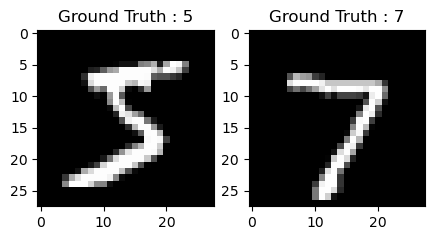

In [280]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# creates a figure with two subplots, each displaying an image and its corresponding label.
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Text(0.5, 1.0, 'Ground Truth : 7')

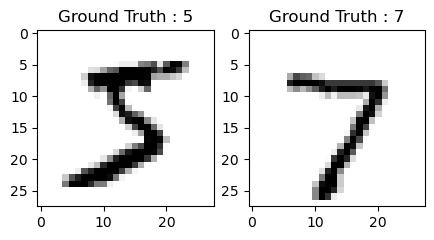

In [281]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# creates a figure with two subplots, each displaying an image and its corresponding label.
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0], cmap=plt.cm.binary)
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0], cmap=plt.cm.binary)
plt.title("Ground Truth : {}".format(test_Y[0]))

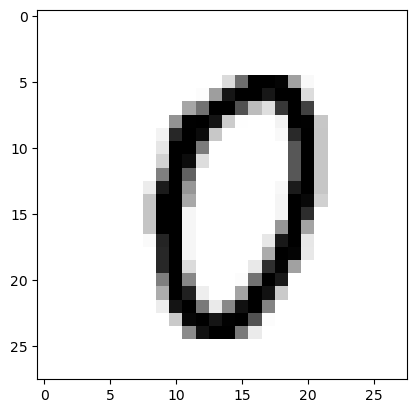

In [282]:
import matplotlib.pyplot as plt
plt.imshow(train_X[1000], cmap=plt.cm.binary)
plt.show()


In [283]:
#Data Preprocessing

train_X = keras.utils.normalize(train_X) # Normalize the training data
test_X = keras.utils.normalize(test_X) # Normalize the test data

train_X = train_X.reshape(-1, 28,28, 1) # convert each 28 x 28 image of the train datta into a matrix of size 28 x 28 x 1 which is fed into the network.
test_X = test_X.reshape(-1, 28,28, 1) #  # convert each 28 x 28 image of the train datta into a matrix of size 28 x 28 x 1 which is fed into the network.

print('Training data shape : ', train_X.shape, train_Y.shape) #print the shape of the training data using the train_X.shape, train_Y.shape functions.
print('Testing data shape : ', test_X.shape, test_Y.shape) #print the shape of the test data using the test_X.shape and test_Y.shape functions.


Training data shape :  (60000, 28, 28, 1) (60000,)
Testing data shape :  (10000, 28, 28, 1) (10000,)


In [284]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = keras.utils.to_categorical(train_Y, 10)
test_Y_one_hot = keras.utils.to_categorical(test_Y, 10)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [285]:
import keras
from keras.models import Sequential#,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input


**Define a network:**

In [286]:
model = Sequential()#create a convolutional neural network (CNN) model for image classification.

model.add(Input(shape=(28,28,1))) #The first layer in the CNN model is the input layer. The input shape parameter should be the shape of 1 sample. In this case, it's the same (28, 28, 1) that corresponds to  the (28, 28) pixel images with a single channel (grayscale).
          
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same')) #apply 32 filters of size 3*3.  The padding parameter is set to 'same', which means that the output size of the layer will be the same as the input size.
model.add(MaxPooling2D((2, 2),padding='same'))  #apply max pooling with a pool size of 2*2. The padding parameter is set to 'same', which means that the output size of the layer will be the same as the input size.

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) #num_classes = 10



In [287]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [288]:
#Compile the specified model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



## 
- **Split the data into training and validation sets**
- **Monitor the accuracy and loss on both sets during training**
- **Add an early stopping callback to prevent overfitting**

In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Split data into training, validation, and test sets
train_X_partial, val_X, train_Y_partial, val_Y = train_test_split(
    train_X, train_Y_one_hot, test_size=0.2, random_state=42)

print(f"Training set shape: {train_X_partial.shape}, {train_Y_partial.shape}")
print(f"Validation set shape: {val_X.shape}, {val_Y.shape}")
print(f"Test set shape: {test_X.shape}, {test_Y_one_hot.shape}")

Training set shape: (48000, 28, 28, 1), (48000, 10)
Validation set shape: (12000, 28, 28, 1), (12000, 10)
Test set shape: (10000, 28, 28, 1), (10000, 10)


In [ ]:
# Set up EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',         # Monitor validation loss
    patience=3,                 # Stop training after 3 epochs of no improvement
    restore_best_weights=True   # Restore the weights of the best epoch
)

# Train the model with training and validation sets
batch_size = 128
epochs = 20

history = model.fit(
    train_X_partial,
    train_Y_partial,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(val_X, val_Y),
    callbacks=[early_stopping],  # Add EarlyStopping callback here
    verbose=1
)

# record best epoch
best_epoch = early_stopping.stopped_epoch - early_stopping.patience
print(f"Best epoch: {best_epoch}")

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7987 - loss: 0.6334 - val_accuracy: 0.9742 - val_loss: 0.0829
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9760 - loss: 0.0766 - val_accuracy: 0.9822 - val_loss: 0.0585
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 0.9856 - val_loss: 0.0462
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9890 - loss: 0.0338 - val_accuracy: 0.9887 - val_loss: 0.0393
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9915 - loss: 0.0275 - val_accuracy: 0.9894 - val_loss: 0.0361
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9934 - loss: 0.0214 - val_accuracy: 0.9829 - val_loss: 0.0595
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9949 - loss: 0.0165 - val_accuracy: 0.9872 - val_loss: 0.0430
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9946 - loss: 0.0162 - val_acc

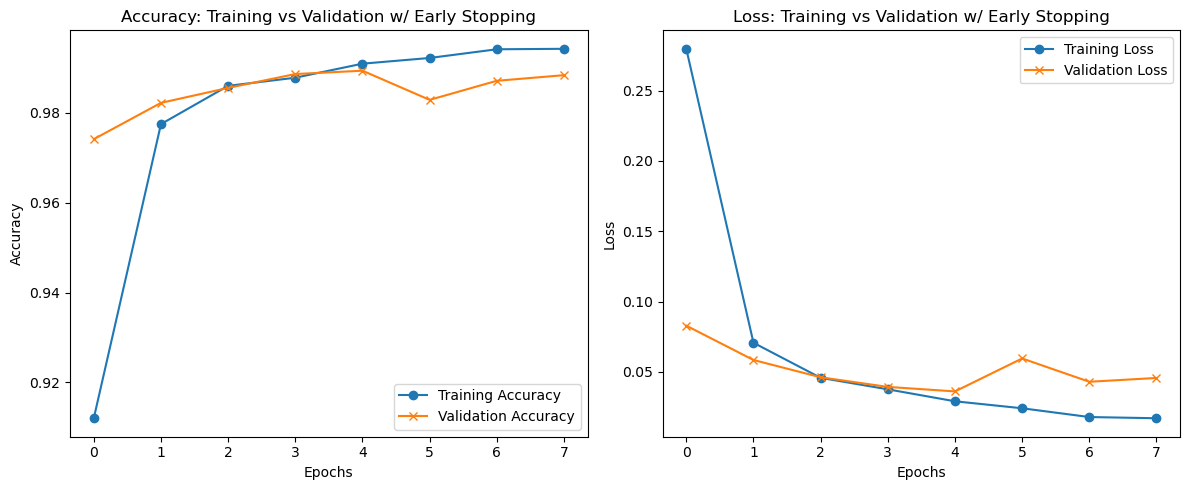

In [291]:
# Plot training and validation accuracy/loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Accuracy: Training vs Validation w/ Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Loss: Training vs Validation w/ Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



## Accuracy and loss with batch=64/256
<img src="https://github.com/zysea23/Markdown_Images/blob/main/A&L-batch=64.png?raw=true" alt="batch=64" width="700" height="300">
<img src="https://github.com/zysea23/Markdown_Images/blob/main/A&L-batch=256.png?raw=true" alt="batch=256" width="700" height="300">


In [ ]:
# Retrain the model on the full training set (training + validation)
print("Retraining the model on the full training set...")
train_X_full = np.concatenate([train_X_partial, val_X], axis=0)
train_Y_full = np.concatenate([train_Y_partial, val_Y], axis=0)

final_history = model.fit(
    train_X_full,
    train_Y_full,
    batch_size=batch_size,
    epochs=best_epoch,
    verbose=1
)



Retraining the model on the full training set...
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9906 - loss: 0.0298
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9936 - loss: 0.0206
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9951 - loss: 0.0165
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9950 - loss: 0.0140
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9962 - loss: 0.0117
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9964 - loss: 0.0096
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9969 - loss: 0.0085
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9980 - loss: 0.0062
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9987 - loss: 0.0044
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9980 - loss: 0.0058
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.997

In [293]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_X, test_Y_one_hot, verbose=1)
print(f"Final Test Loss: {test_loss}, Final Test Accuracy: {test_accuracy}")

# Predict the classes of the test set
predicted_classes = model.predict(test_X)   

# The predicted_classes variable contains the probability values of the predictions
predicted_classes[0]    

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9879 - loss: 0.0505
Final Test Loss: 0.038506221026182175, Final Test Accuracy: 0.9908000230789185
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([1.1351428e-15, 4.2626804e-14, 3.1359464e-11, 4.6673709e-15, 4.5705203e-14, 8.2268778e-15, 1.1316088e-18, 1.0000000e+00, 3.2360500e-17, 9.5682982e-11], dtype=float32)

In [294]:
# returns the indices of the maximum values of predicted_classes array, which are the predicted classes.
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)   
predicted_classes.shape, test_Y[:10]

((10000,), array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

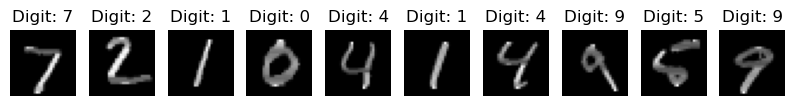

In [295]:
# show the first 10 image in the test data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(test_X[i], cmap='gray')
    plt.title("Digit: {}".format(test_Y[i]))
    plt.axis('off')
plt.show()